# Import Library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import data set

In [2]:
df: pd.DataFrame = pd.read_excel("./filtered_data.xlsx",sheet_name="All data")
# drop_list=[3,4]+list(range(6,11))+list(range(13,15))
# df=df.drop(labels=drop_list,axis=1)
df.head()


,Unnamed: 0,Gender,Brand,Type,6,7,8,9,10,13,...,Stand.1,Head storage.1,Travel storage.1,Dual Speed.1,Charity.1,Warranty.1,Built-in toothpaste.1,Battery Indicator.1,Attachments.1,Extra head.1
0,Respondent 1,Female,1,Rechargeable,electric powered,replaceable brush,NaN,NaN,NaN,having to change batteries,...,1,0,1,0,0,0,0,1,0,0
1,Respondent 2,Female,0,Manual,comfortable handle,cleans teeth well,replaceable brush,NaN,NaN,having to change batteries,...,0,1,0,0,0,0,1,1,0,0
2,Respondent 3,Male,0,Manual,fairly small,rubberized grip,indicator bristles,battery included,good price,2-different bristles,...,1,0,0,0,0,0,0,1,0,0
3,Respondent 4,Female,0,Manual,cleans teeth well,almost same price as regular brush,NaN,NaN,NaN,have to change battery,...,1,0,0,0,0,0,0,0,0,0
4,Respondent 5,Male,1,Manual,Cleans teeth well,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,1


# 2. Analysis
## 2.1 Oral B vs other brands 
> characteristics rating by brands and brush type

In [3]:
df_character_rate = df.loc[:, 'Grip':'Packaging']
df_character_rate['Brand'] = df.loc[:, 'Brand']
# df_character_rate['Type'] = df.loc[:, 'Type']
df_character_rate.head()

,Grip,Weight,On/Off,Clean/Rinse,Vibration,Waterproof,Travel,Replace Battery,Replace Brush Head,$ Replacements,...,Technology,Looks Cool,Distinguishable,Match Décor,Easy to Store,Small Space,Easy to hold,Toothbrush Sized,Packaging,Brand
0,4,3,5,5,4,5,5,5,5,5,...,3,2,3,1,5,3,4,3,1,1
1,4,5,5,5,3,5,1,4,4,5,...,2,2,4,1,4,4,4,5,1,0
2,1,3,3,4,5,5,4,4,4,5,...,1,2,3,1,4,4,3,4,2,0
3,4,3,4,5,4,5,4,3,4,5,...,2,3,5,2,5,4,5,3,2,0
4,2,2,3,1,3,4,5,4,2,2,...,2,2,2,4,2,3,3,1,4,1


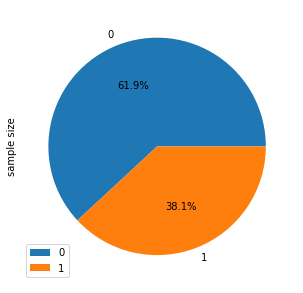

In [4]:
group_brand = df_character_rate.groupby(['Brand'])
# group_type = df_character_rate.groupby(['Type'])

size_brand = group_brand.size().to_frame('sample size')
# size_type=group_type.size().to_frame('sample size')

plot_brand = size_brand.plot.pie(y='sample size', figsize=(5, 5), autopct='%1.1f%%')
# plot_type = size_type.plot.pie(y='sample size', figsize=(5, 5), autopct='%1.1f%%')

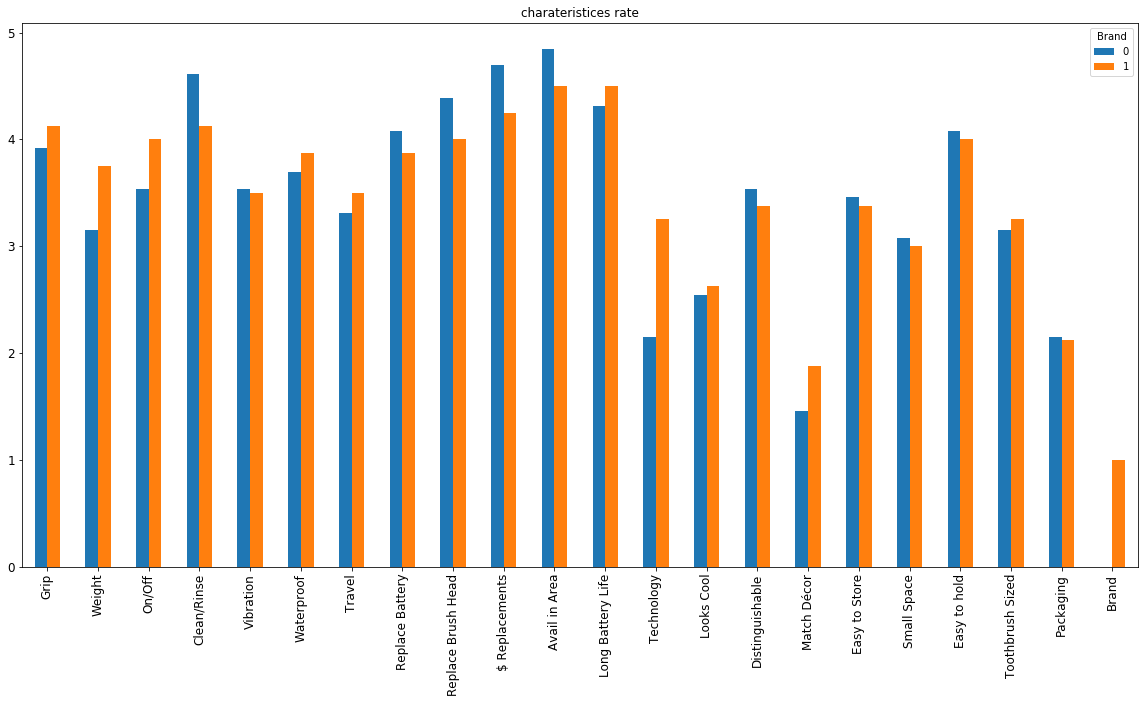

In [5]:
group = df_character_rate.groupby(['Brand'])
df_mean_value = group.apply(pd.DataFrame.mean)
ax = df_mean_value.T.plot(kind='bar', title="charateristices rate", figsize=(20, 10), legend=True,
                              fontsize=12)


> Pricing of current product

In [6]:
df_character_rate_drop=df_character_rate.drop(labels=["Brand"],axis=1)
df_character_rate_drop.head()

,Grip,Weight,On/Off,Clean/Rinse,Vibration,Waterproof,Travel,Replace Battery,Replace Brush Head,$ Replacements,...,Long Battery Life,Technology,Looks Cool,Distinguishable,Match Décor,Easy to Store,Small Space,Easy to hold,Toothbrush Sized,Packaging
0,4,3,5,5,4,5,5,5,5,5,...,5,3,2,3,1,5,3,4,3,1
1,4,5,5,5,3,5,1,4,4,5,...,4,2,2,4,1,4,4,4,5,1
2,1,3,3,4,5,5,4,4,4,5,...,5,1,2,3,1,4,4,3,4,2
3,4,3,4,5,4,5,4,3,4,5,...,5,2,3,5,2,5,4,5,3,2
4,2,2,3,1,3,4,5,4,2,2,...,2,2,2,2,4,2,3,3,1,4


Text(0.5, 1.0, 'Correlation between different fearures')

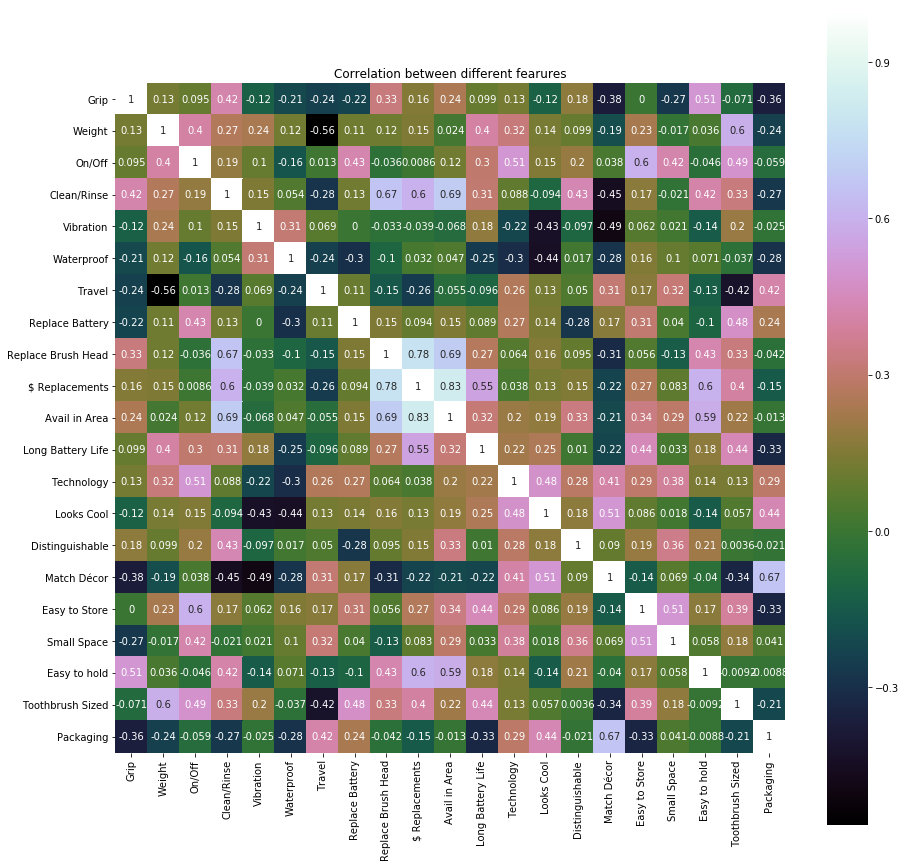

In [7]:
correlation = df_character_rate_drop.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')

In [8]:
sales=df_character_rate.groupby(['Brand']).sum()
sales

,Grip,Weight,On/Off,Clean/Rinse,Vibration,Waterproof,Travel,Replace Battery,Replace Brush Head,$ Replacements,...,Long Battery Life,Technology,Looks Cool,Distinguishable,Match Décor,Easy to Store,Small Space,Easy to hold,Toothbrush Sized,Packaging
Brand,,,,,,,,,,,,,,,,,,,,,
0,51,41,46,60,46,48,43,53,57,61,...,56,28,33,46,19,45,40,53,41,28
1,33,30,32,33,28,31,28,31,32,34,...,36,26,21,27,15,27,24,32,26,17


In [9]:
groupby_sales=df_character_rate.groupby(['Brand']).mean()
groupby_sales

,Grip,Weight,On/Off,Clean/Rinse,Vibration,Waterproof,Travel,Replace Battery,Replace Brush Head,$ Replacements,...,Long Battery Life,Technology,Looks Cool,Distinguishable,Match Décor,Easy to Store,Small Space,Easy to hold,Toothbrush Sized,Packaging
Brand,,,,,,,,,,,,,,,,,,,,,
0,3.923077,3.153846,3.538462,4.615385,3.538462,3.692308,3.307692,4.076923,4.384615,4.692308,...,4.307692,2.153846,2.538462,3.538462,1.461538,3.461538,3.076923,4.076923,3.153846,2.153846
1,4.125000,3.750000,4.000000,4.125000,3.500000,3.875000,3.500000,3.875000,4.000000,4.250000,...,4.500000,3.250000,2.625000,3.375000,1.875000,3.375000,3.000000,4.000000,3.250000,2.125000


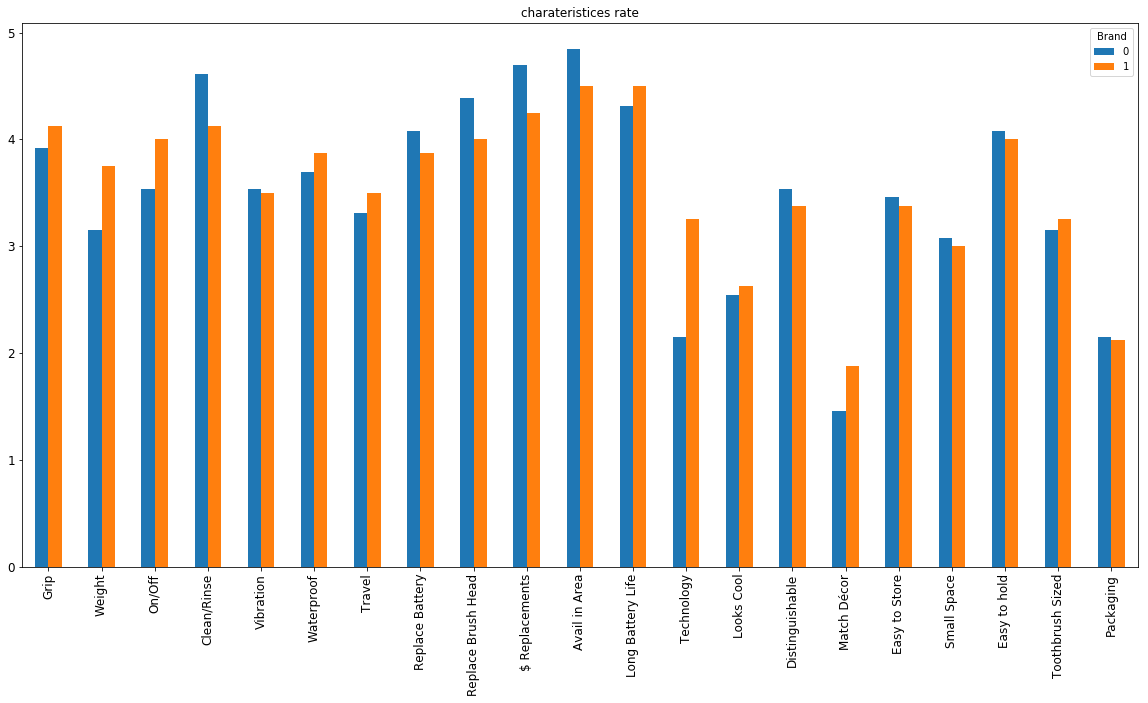

In [10]:
ax = groupby_sales.T.plot(kind='bar', title="charateristices rate", figsize=(20, 10), legend=True,
                              fontsize=12)

In [11]:
cols=df_character_rate_drop.columns.tolist()
cols

['Grip',
 'Weight',
 'On/Off',
 'Clean/Rinse',
 'Vibration',
 'Waterproof',
 'Travel',
 'Replace Battery',
 'Replace Brush Head',
 '$ Replacements',
 'Avail in Area',
 'Long Battery Life',
 'Technology',
 'Looks Cool',
 'Distinguishable',
 'Match Décor',
 'Easy to Store',
 'Small Space',
 'Easy to hold',
 'Toothbrush Sized',
 'Packaging']

In [12]:
X = df_character_rate.iloc[:,0:-1].values
X.astype(np.float32)
y = df_character_rate.iloc[:,-1].values
X

array([[4, 3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 3, 2, 3, 1, 5, 3, 4, 3, 1],
       [4, 5, 5, 5, 3, 5, 1, 4, 4, 5, 5, 4, 2, 2, 4, 1, 4, 4, 4, 5, 1],
       [1, 3, 3, 4, 5, 5, 4, 4, 4, 5, 5, 5, 1, 2, 3, 1, 4, 4, 3, 4, 2],
       [4, 3, 4, 5, 4, 5, 4, 3, 4, 5, 5, 5, 2, 3, 5, 2, 5, 4, 5, 3, 2],
       [2, 2, 3, 1, 3, 4, 5, 4, 2, 2, 3, 2, 2, 2, 2, 4, 2, 3, 3, 1, 4],
       [4, 5, 4, 5, 5, 5, 3, 3, 5, 5, 5, 4, 4, 3, 5, 2, 3, 3, 5, 4, 4],
       [4, 4, 3, 5, 2, 4, 2, 5, 4, 5, 5, 5, 3, 3, 3, 2, 3, 2, 5, 4, 2],
       [5, 4, 3, 3, 3, 4, 2, 2, 4, 4, 4, 5, 2, 4, 2, 1, 3, 1, 3, 3, 1],
       [5, 4, 5, 4, 4, 4, 3, 5, 4, 5, 5, 5, 4, 1, 3, 1, 5, 5, 5, 5, 1],
       [4, 3, 5, 4, 2, 1, 4, 5, 5, 5, 5, 5, 3, 5, 4, 2, 4, 4, 4, 5, 3],
       [5, 4, 3, 5, 3, 4, 4, 5, 5, 4, 5, 3, 3, 3, 4, 1, 4, 3, 4, 3, 2],
       [4, 3, 4, 5, 2, 2, 5, 4, 5, 5, 5, 5, 5, 4, 4, 3, 3, 4, 4, 3, 3],
       [3, 4, 4, 4, 2, 3, 3, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 3, 4, 2, 3],
       [4, 4, 3, 5, 4, 3, 2, 5, 5, 5, 4, 5, 1, 1, 3, 1, 3, 1, 4,

In [13]:
y

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

C:\Users\dirk_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dirk_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.05000000e+00  1.34211911e-01  1.00243843e-01  4.40882447e-01
  -1.27990179e-01 -2.19623257e-01 -2.47705905e-01 -2.34787138e-01
   3.46055357e-01  1.64717443e-01  2.56464710e-01  1.04111409e-01
   1.33658458e-01 -1.23417616e-01  1.86031243e-01 -3.93859909e-01
   0.00000000e+00 -2.80943014e-01  5.35983454e-01 -7.43525059e-02
  -3.78043207e-01]
 [ 1.34211911e-01  1.05000000e+00  4.24667882e-01  2.79086362e-01
   2.53447304e-01  1.30469985e-01 -5.93033982e-01  1.20042783e-01
   1.23571824e-01  1.57740351e-01  2.49764129e-02  4.23308756e-01
   3.38432642e-01  1.44231742e-01  1.04173243e-01 -1.98976752e-01
   2.41983505e-01 -1.82401930e-02  3.76985530e-02  6.26345797e-01
  -2.48512170e-01]
 [ 1.00243843e-01  4.24667882e-01  1.05000000e+00  2.00434245e-01
   1.04736550e-01 -1.72532606e-01  1.35134650e-02  4.48304096e-01
  -3.77577350e-02  8.98607321e-03  1.25921673e-01  3.15225735e-01
   5.32291667e-01  1.61591590e-01  2.05513936e-01  4.02877868e-02
   6.26939179e-01  

In [16]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.05000000e+00  1.34211911e-01  1.00243843e-01  4.40882447e-01
  -1.27990179e-01 -2.19623257e-01 -2.47705905e-01 -2.34787138e-01
   3.46055357e-01  1.64717443e-01  2.56464710e-01  1.04111409e-01
   1.33658458e-01 -1.23417616e-01  1.86031243e-01 -3.93859909e-01
  -1.11022302e-17 -2.80943014e-01  5.35983454e-01 -7.43525059e-02
  -3.78043207e-01]
 [ 1.34211911e-01  1.05000000e+00  4.24667882e-01  2.79086362e-01
   2.53447304e-01  1.30469985e-01 -5.93033982e-01  1.20042783e-01
   1.23571824e-01  1.57740351e-01  2.49764129e-02  4.23308756e-01
   3.38432642e-01  1.44231742e-01  1.04173243e-01 -1.98976752e-01
   2.41983505e-01 -1.82401930e-02  3.76985530e-02  6.26345797e-01
  -2.48512170e-01]
 [ 1.00243843e-01  4.24667882e-01  1.05000000e+00  2.00434245e-01
   1.04736550e-01 -1.72532606e-01  1.35134650e-02  4.48304096e-01
  -3.77577350e-02  8.98607321e-03  1.25921673e-01  3.15225735e-01
   5.32291667e-01  1.61591590e-01  2.05513936e-01  4.02877868e-02
   6.2693917

Text(0.5, 1.0, 'Correlation between different features')

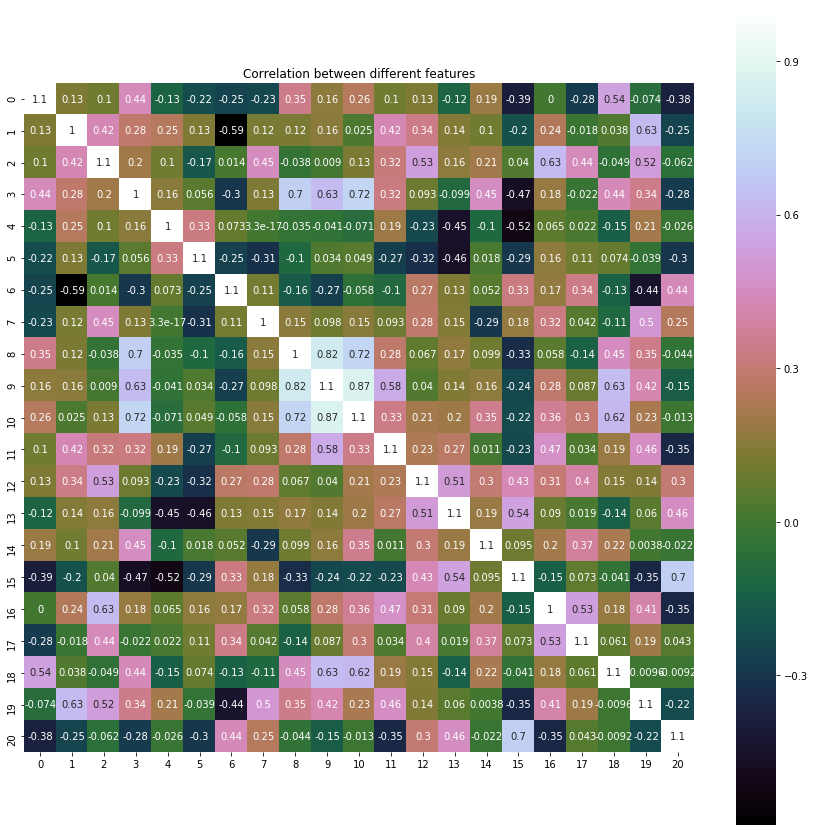

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [18]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.83948697e-01 -1.41457286e-01 -2.17013656e-01 -5.29361630e-02
  -4.26273222e-01 -4.22961966e-01  1.91439863e-01  1.21153607e-01
  -1.12091289e-01  6.35452233e-02 -1.71912052e-01  2.50020666e-01
   1.66254873e-02  1.06432611e-01  1.02704020e-01 -2.23935128e-01
  -6.63866401e-02 -3.79432974e-01  2.69511454e-01  8.52961155e-02
   2.73985628e-01]
 [ 2.20463052e-01  4.07599138e-03  2.99504725e-01 -2.36905390e-01
  -2.84505509e-01  3.06930946e-01  1.64862984e-01 -1.06712479e-01
  -2.56420279e-01  8.17703130e-02 -1.05383420e-01 -1.12057684e-01
   1.48823761e-01  1.55385720e-01 -5.36924756e-01  3.87958760e-02
   3.53627076e-01  4.15895415e-02  5.78466632e-02  9.97558311e-02
   1.39888156e-01]
 [ 1.81629129e-01  2.65474994e-01  3.30128526e-01  5.70264531e-02
  -1.62268146e-01 -1.60813399e-01  1.77373602e-01  1.62749831e-01
   4.09932102e-02  6.09213763e-04  9.11033914e-02  3.67019403e-01
  -3.96274665e-01 -5.19244125e-01 -6.51641921e-03  4.67040877e-02
   2.36431445e-01  8.433

In [19]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.212471603795086
3.6201530607860777
2.7673827233404644
2.0420647919987887
1.6841203248529546
1.306805173091689
1.136592745595403
1.0489427593852036
0.8726732155476564
0.5703246449172601
0.5118843885729564
0.3658072578248588
0.3067278004447072
0.24390531747256716
0.13955537766942924
0.10144472508729616
0.051213331364346526
0.04057212214051896
0.019811625033271777
0.007547011079472221
8.968964009515166e-17


In [20]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[23.63932700133825,
 16.41792771331554,
 12.550488541226592,
 9.261064816321033,
 7.637733899559882,
 5.9265540729781785,
 5.154615626283006,
 4.757110019887543,
 3.9577016578124993,
 2.586506326155374,
 2.321471149990731,
 1.6589898314052547,
 1.3910557843297373,
 1.106146564501438,
 0.6329042071175928,
 0.46006678044125227,
 0.2322600061875125,
 0.184000553925256,
 0.0898486396066747,
 0.034226807616654045,
 4.067557373929779e-16]

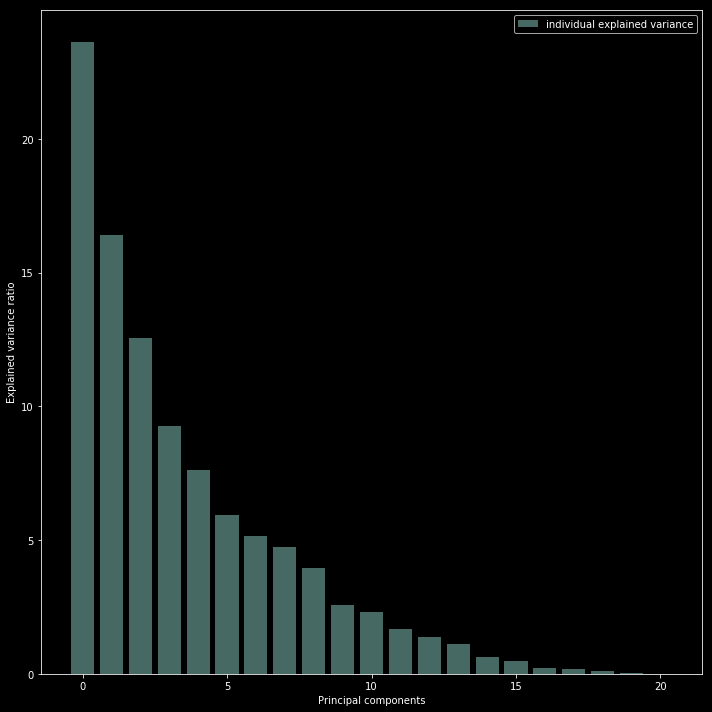

In [21]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 10))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(21,1), 
                      eig_pairs[1][1].reshape(21,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.1839487  -0.14145729]
 [ 0.22046305  0.00407599]
 [ 0.18162913  0.26547499]
 [ 0.35765884 -0.09049606]
 [ 0.04863529 -0.18578434]
 [ 0.01068978 -0.27071221]
 [-0.15616841  0.25708825]
 [ 0.08699427  0.24943129]
 [ 0.31302224 -0.03114592]
 [ 0.36118788 -0.00975284]
 [ 0.34435279  0.07209212]
 [ 0.27686934  0.07440286]
 [ 0.11201121  0.40790181]
 [ 0.0277325   0.38094158]
 [ 0.14089875  0.11718285]
 [-0.20404138  0.37928086]
 [ 0.23222101  0.16880066]
 [ 0.08138172  0.23538525]
 [ 0.23830525 -0.03384745]
 [ 0.27981506  0.0499636 ]
 [-0.1676372   0.3110774 ]]


In [26]:
Y = X_std.dot(matrix_w)
Y

array([[ 1.76854296,  0.13502779],
       [ 2.2330733 , -0.99230179],
       [-0.42747668, -0.84007857],
       [ 1.37883526,  0.33029257],
       [-8.33332226,  1.09727111],
       [ 1.56220462,  0.65659737],
       [ 1.08947915, -0.04334797],
       [-1.46409958, -1.974684  ],
       [ 2.65005479,  0.50129544],
       [ 1.33193806,  3.63661962],
       [ 0.54343151,  0.05928878],
       [ 0.5836814 ,  3.59637315],
       [-0.12355427,  3.62359444],
       [ 0.88423518, -2.61187656],
       [ 1.23908806, -1.038156  ],
       [-0.64464462, -1.29299629],
       [-0.26993483, -0.65129298],
       [-2.12371391,  0.18761251],
       [-0.44696775, -3.87559174],
       [-1.36676469,  0.15245419],
       [-0.06408568, -0.65610108]])

Text(0, 0.5, 'Cumulative explained variance')

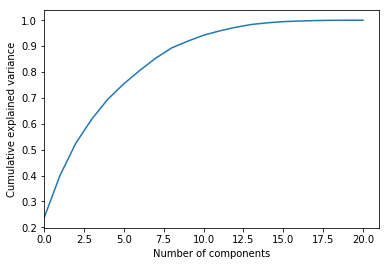

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,21,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [28]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [29]:
print(Y_sklearn)

[[-1.76854296 -0.13502779 -1.04987526 -1.28324381 -1.09217077 -1.41402601
  -0.49275984 -0.38479524  0.17425375  1.80099404]
 [-2.2330733   0.99230179 -1.90169055 -0.29353284  1.0698787   1.72953281
  -0.13144488 -1.43899998 -0.7947686  -0.46888245]
 [ 0.42747668  0.84007857 -1.92647287 -1.17411831 -2.96391896  1.18241689
  -1.34810475  1.20808052 -0.55636619 -0.19304538]
 [-1.37883526 -0.33029257  0.19628041 -2.52567779  0.18621194  0.53077934
  -0.74068379  0.53341744  0.42219586  0.35759841]
 [ 8.33332226 -1.09727111 -0.79266438 -0.19004593 -0.25775749  0.46918538
   0.27814941 -1.08023747  0.86735788 -0.38617623]
 [-1.56220462 -0.65659737  0.59308251 -0.48104992  0.32751867  2.27722365
   2.41093858  1.0388062   1.36936422  0.0759856 ]
 [-1.08947915  0.04334797  0.86446952  1.70036251  0.29720457  0.9524105
  -0.63813825 -1.1184898   0.68741928  0.04071789]
 [ 1.46409958  1.974684   -0.47375402  2.50532385  1.80176319 -0.06525484
  -1.84138996  1.00849144  0.32247852  1.01136121]
 

In [30]:
Y_sklearn.shape

(21, 10)